Demonstration

In [ ]:
# import
import pandas as pd                     # dataset
import pygmt                            # map
from obspy import read, UTCDateTime     # seismogram
import matplotlib.pyplot as plt         # figure
import plotly.graph_objects as go       # figure (interactive)

In [25]:
# load channel file
df = pd.read_csv("tmp.ch",sep="\s+",names=[
    "channel","flag","delay","station","component","scale","bit","sensitivity","unit",
    "period","damping","factor","digitization",
    "latitude","longitude","height","Pcorr","Scorr","note"
])
print(df)

   channel  flag  delay station  component  scale  bit  sensitivity unit  \
0     F100     1      0    OBS1          1      4   27          400  m/s   
1     F101     1      0    OBS1          2      4   27          400  m/s   
2     F102     1      0    OBS1          3      4   27          400  m/s   
3     F200     1      0    OBS2          1      4   27          400  m/s   
4     F201     1      0    OBS2          2      4   27          400  m/s   
5     F202     1      0    OBS2          3      4   27          400  m/s   
6     F300     1      0    OBS3          1      4   27          400  m/s   
7     F301     1      0    OBS3          2      4   27          400  m/s   
8     F302     1      0    OBS3          3      4   27          400  m/s   
9     F400     1      0    OBS4          1      4   27          400  m/s   
10    F401     1      0    OBS4          2      4   27          400  m/s   
11    F402     1      0    OBS4          3      4   27          400  m/s   

    period 

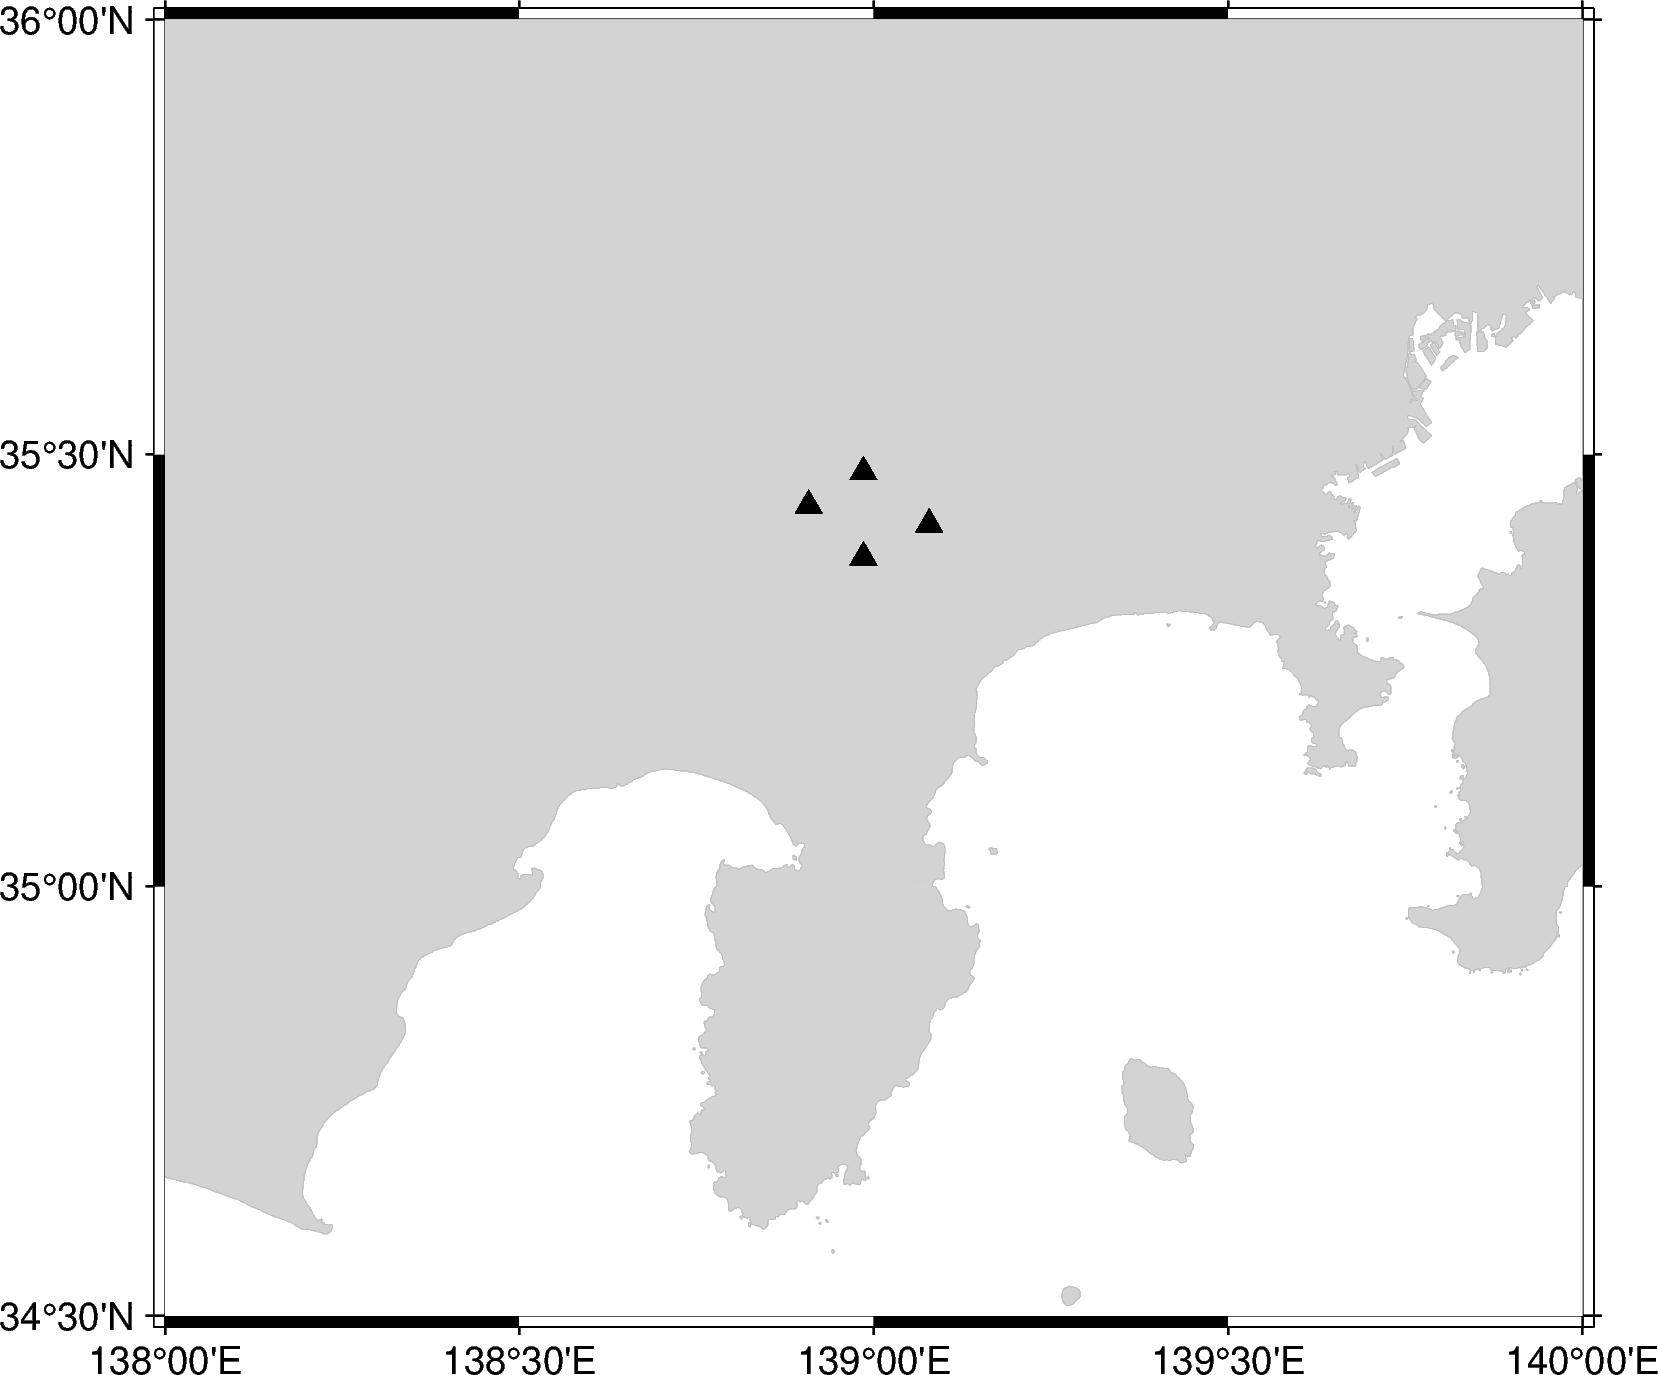

In [17]:
# show map
fig = pygmt.Figure()
fig.basemap(region=[138,140,34.5,36],projection="M12c",frame="a")
fig.coast(land="lightgray",water="white",shorelines="0.1p,gray")
fig.plot(x=df["longitude"],y=df["latitude"],fill="black",style="t0.25c",pen="black")
fig.show()

In [18]:
# load sac file
st = read("sac/F1/08.06.21.F1.U")

In [19]:
# extract station information
info = st[0].stats
print(f"station: {info.station}")
print(f"channel: {info.channel}")
print(f"start: {info.starttime}")
print(f"end: {info.endtime}")
print(f"fs: {info.sampling_rate}")
print(f"dt: {info.delta}")
print(f"Ns: {info.npts}")

station: F1
channel: U
start: 2025-08-06T21:00:00.000000Z
end: 2025-08-06T21:59:59.990000Z
fs: 100.0
dt: 0.01
Ns: 360000


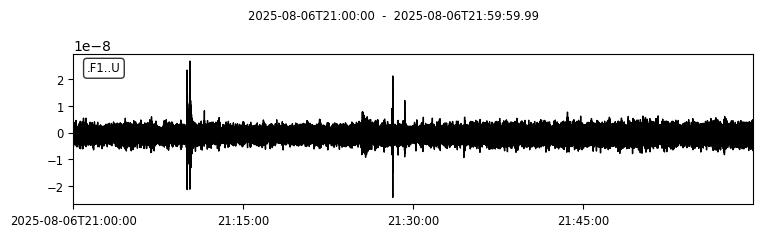

In [20]:
# show raw data
fig = st[0].plot()

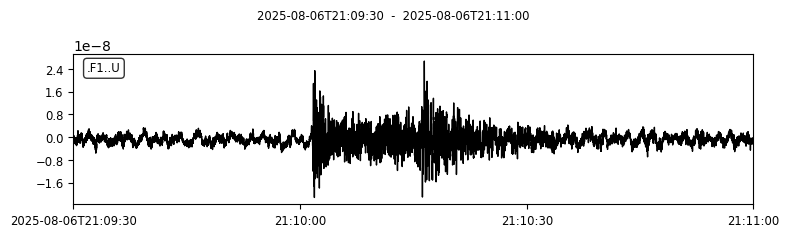

In [21]:
# slice data
start = UTCDateTime(2025,8,6,21,9,30)
end = UTCDateTime(2025,8,6,21,11,0)

st_slice = st.copy()
st_slice = st_slice.slice(starttime=start,endtime=end)
fig = st_slice.plot()

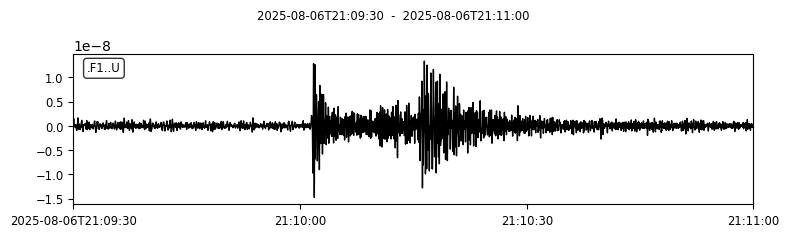

In [22]:
# apply bandpass filter
st_filter = st.copy()
st_filter.detrend(type="linear")
st_filter.filter("bandpass",freqmin=2,freqmax=10,corners=2,zerophase=True)

# fig = st.plot()
# fig = st_filter.plot()

st_filter_slice = st_filter.copy()
st_filter_slice = st_filter_slice.slice(starttime=start,endtime=end)
fig = st_filter_slice.plot()

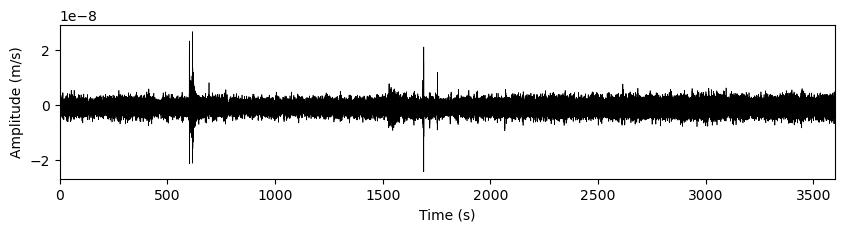

In [23]:
# extract data & show with plt
t = st[0].times()
y = st[0].data

plt.figure(figsize=(10,2))
plt.plot(t,y,lw=0.5,c="black")
plt.xlim(0,3600)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude (m/s)")
plt.show()

In [24]:
# show interactive figure with plotly
# load
st = read("sac/F1/08.06.21.F1.U")

# information
station = st[0].stats.station
channel = st[0].stats.channel

# filter
st.detrend(type="linear")
st.filter("bandpass",freqmin=2,freqmax=10,corners=2,zerophase=True)

# slice
st = st.slice(starttime=start,endtime=end)

# extract
# t = st[0].times()
t = [ti.datetime for ti in st[0].times("utcdatetime")]
y = st[0].data

# plot & show
fig = go.Figure()
fig.add_trace(go.Scatter(x=t,y=y,mode="lines",name=f"Station {station} (channel {channel})"))
fig.update_layout(xaxis_title="Time",yaxis_title="Amplitude",template="plotly_white")
fig.show()